<font color=darkblue> 

## Описание задачи
___
### Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
### Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта. 

</div>

## Описание тарифов
__Тариф «Смарт»__
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

__Тариф «Ультра»__
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

__Особое условие:__ «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных

__Таблица users (информация о пользователях):__
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

__Таблица calls (информация о звонках):__
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

__Таблица messages (информация о сообщениях):__
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

__Таблица internet (информация об интернет-сессиях):__
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

__Таблица tariffs (информация о тарифах):__
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

__Вызываю библиотеки__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

__Открываю датасеты__

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

<font color=darkblue> 
## Тарифы

In [3]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

__В условиях тарифов указано, что округление происходит по МБ и услуги включены в стоимость помегобайтно, однако, при простом делении МБ на 1024, становится понятно что это целые ГБ, а также в рассчетах используется цена за 1 ГБ. Похоже либо на ошибку, либо на введение в заблуждение__

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Молодец, что провёл первичный анализ полученных данных, это всегда быстро помогает понять с чем предстоит работать, по выводам нареканий нет - всё верно и точно
</div>

<font color=darkblue> 
# Подготовка данных

- Приведение данных к нужным типам;
- Исправление ошибок в данных.

<font color=darkblue> 
 ## Анализ таблицы 'users'

__Смотрю что в данных__

In [4]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


__Проверю типы и наличие пропусков__

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


__Что делаю__
- Есть данные по пользователям, покинувшим тариф. Проверю не связано ли это с внутренним переходом.
- Заменю формат даты.
- Заменю город на Москва и Немосква, так как нам понадобится это для последующего сравнения.
- Из данных видно, что пользователи приходят, но ушли ттолько 38 человек. Значит с каждым месяцем их количество должно увеличиваться. Это может повлиять на статистику, проверю.

__Меняю тип даты__

In [6]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y/%m/%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y/%m/%d')

__Проверяю на дубликаты и возможные смены тарифов__

In [7]:
users_duplicated = users[users.duplicated(subset=['first_name','last_name', 'city'], keep=False)]
print (users_duplicated)

Empty DataFrame
Columns: [user_id, age, churn_date, city, first_name, last_name, reg_date, tariff]
Index: []


__Заменяю названия городов__

In [8]:
users.loc[users['city'] != 'Москва', 'city'] = 'Немосква'

__Проверю приход новых пользователей__

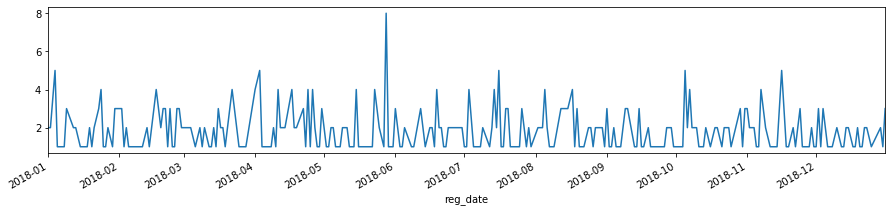

In [9]:
users.groupby('reg_date')['user_id'].count().plot(x= 'reg_date', y='user_id',
                                                    figsize = (15,3),
                                                    kind = 'line')

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

График наглядный, но не забывай подписывать оси на графиках и указывать название для графика

### Вывод

__Пользователи приходят постоянно и накапливаются. Статистика по количеству звонков, данных и сообщений по месяцам будет зависеть от количества активных абонентов тарифного плана на соответствующий месяц__

<font color=darkblue> 
 ## Анализ таблицы 'calls'

__Смотрю что в данных__

In [10]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


__Проверю типы и наличие пропусков__

In [11]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


__Что делаю__
- Пропусков данных нет.
- Заменю формат даты.
- Есть нолевые значения в минутах. Исходя из понимания того, что «Мегалайн» всегда округляет вверх значения минут вверх, приравняю ноли к единицам.
- Заменю формат минут и округлю их вверх.

__Меняю тип даты__

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y/%m')

__Определю процент нолевых значений__

In [13]:
zero_calls = calls[calls['duration'] == 0]

In [14]:
print('Процент нолевых значений', round(len(zero_calls) / len(calls) * 100, 1))

Процент нолевых значений 19.6


__Заменяю ноли на единицы__

In [15]:
calls['duration'] = calls['duration'].replace(0,1)

__Округляю значения по верхнему и сделаю их целочисленными__

In [16]:
calls['duration']  = np.ceil(calls['duration']).astype(int)

### Вывод

__Почти двадцать процентов неудавшихся соединений, приравненных к минуте, вероятно дадут выброс на гистограмме__

<font color=darkblue> 
 ## Анализ таблицы 'messages'

__Смотрю что в данных__

In [17]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


__Проверю типы и наличие пропусков__

In [18]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


__Что делаю__
- Пропусков данных нет.
- Заменю формат даты.

__Меняю тип даты__

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y/%m/%d')

### Вывод

__Судя по количеству строк, это самая малочисленная группа__

<font color=darkblue> 
 ## Анализ таблицы 'internet'

__Смотрю что в данных__

In [20]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


__Проверю типы и наличие пропусков__

In [21]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


__Что делаю__
- Пропусков данных нет.
- Заменю формат даты.
- Значения мегабайт необходимо округлить вверх, как указано в условиях тарифа по аналогии с минутами, но в Гб, как указано в условиях таблицы Тарифы. Значения, при этом, станут целочисленными.
- Столбец "unnamed:0" дублирует индекс. Видимо остался после склеивания. Нужно удалить

__Меняю тип даты__

In [22]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y/%m/%d')

__Округляю МБ вверх и делаю их целочисленными Гб__

In [23]:
internet['mb_used'] = np.ceil(internet['mb_used'] / 1024).astype(int)

__Удаляю лищний столбец__

In [24]:
del internet['Unnamed: 0']

### Вывод

__В условиях тарифа указано, что округление происходит по МБ, а в рассчетах используется цена за 1 ГБ. Похоже либо на ошибку либо на введение в заблуждение__

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Этап предобработки закончен, со всеми действиями и выводами согласен, замечательно. Так же порадовало что всё делишь на отдельные ячейки и пишешь выводы, можно приступать к основной части анализа</div>

<font color=darkblue> 
# Анализ данных

## Звонки
__Что делаю__

- Объеденю таблицы звонков и пользователей, чтобы иметь информацию о тарифах и городе.
- Приведу дату к формату месяца, чтобы исследовать информацию помесячно.
- Подготовлю таблицу помесячных звонков.
- Определю стреднюю продолжительность звонка в месяц.
- Построю график количества потраченных минут в месяц.
- Построю гистограмму звонков.
- Построю гистограмму по разным тарифам и региону Москва/Немосква.


__Обьеденю датафреймы__

In [25]:
united_calls = calls.merge(users, on='user_id', how='left')

__Привожу дату к формату месяца, чтобы исследовать информацию помесячно.__

In [26]:
united_calls['month'] = united_calls.call_date.dt.to_period('M') 

__Получаю таблицу помесячных звонков__

In [27]:
monthly_calls = united_calls.pivot_table(index = ['user_id','month', 'tariff', 'city'],
                                              values = 'duration',
                                              aggfunc = 'sum').reset_index()

__Заменю название на минуты, потому что так привычнее__

In [28]:
monthly_calls.columns = ['user_id', 'month', 'tariff', 'city', 'minuts']

__Определю стреднее количество потраченных минут для абонента в месяц.__

In [29]:
round(monthly_calls['minuts'].mean())

469.0

__Построю график среднего количества потраченных минут для абонента помесячно.__

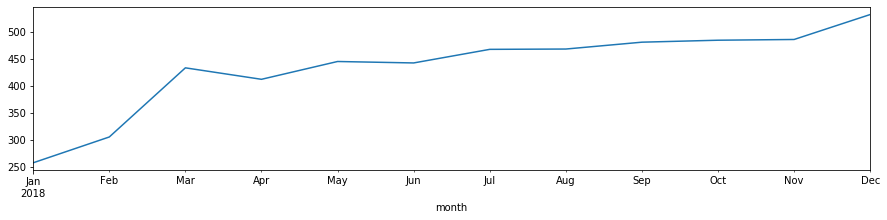

In [30]:
monthly_calls.groupby('month')['minuts']. mean().plot(x= 'month', y='minuts',
                                                    figsize = (15,3),
                                                    kind = 'line')

__Построю гистограмму среднего количества потраченных минут в месяц__

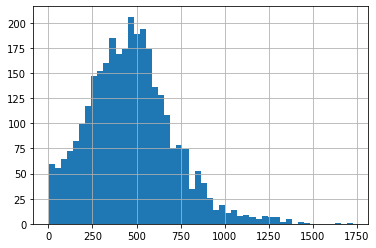

In [31]:
monthly_calls['minuts'].hist(bins = 50)

__Построю гистограммы среднего количества потраченных минут в месяц по городам и тарифам__

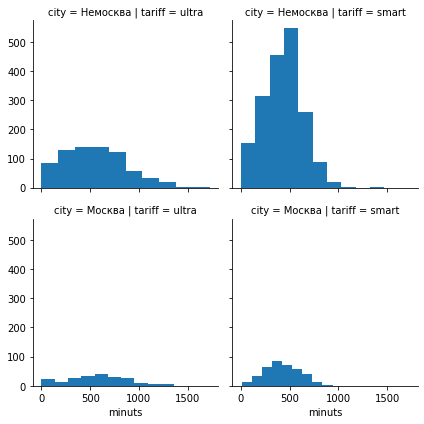

In [32]:
c = sns.FacetGrid(monthly_calls, col= 'tariff', row="city")
c = c.map(plt.hist, 'minuts');

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Графики точно нужно строить детальнее, иначе так из графика не понятно, что изображено, если не залазить в код, а заказчики в будущем точно не будут копать в коде, чтобы понять, что перед ними изображено

### Вывод
- __В среднем тратится 469 минут в месяц.__
- __Увеличение количества потраченных минут, вероятно связано с тем, что тарифные планы были введены в начале года и продавались весь этот год. Соответственно вначале звонков было не много, далее с марта по ноябрь количество потраченных в месяц минут стабилизировалось, а в декабре перед празлниками выросло.__
- __Судя по гистограмме - распределение количества минут - нормальное, при этом для Немосквы скошенное влево. Всплеск у единицы для Москвы, вероятно связан с заменой 0 на 1__


 ## Сообщения
__Что делаю__

- Объеденю таблицы сообщений и пользователей, чтобы иметь информацию о тарифах и городе.
- Приведу дату к формату месяца, чтобы исследовать информацию помесячно.
- Подготовлю таблицу помесячных сообщений.
- Определю стреднее количество сообщений в месяц.
- Построю график дколичества сообщений помесячно.
- Построю гистограмму количества сообщений.
- Построю гистограмму по разным тарифам и региону Москва/Немосква.

__Обьеденю датафреймы__

In [33]:
united_messages = messages.merge(users, on='user_id', how='left')

__Привожу дату к формату месяца, чтобы исследовать информацию помесячно__

In [34]:
united_messages['month'] = messages.message_date.dt.to_period('M') 

__Получаю таблицу помесячных сообщений__

In [35]:
monthly_messages = united_messages.pivot_table(index = ['user_id','month', 'tariff', 'city'],
                                        values = 'id',
                                        aggfunc = 'count').reset_index()
monthly_messages.columns = ['user_id','month','tariff', 'city', 'messages']

__Определю стреднее сообщений для абонента в месяц.__

In [36]:
round(monthly_messages['messages'].mean())

45.0

__Построю график среднего количества сообщений для абонента в месяц.__

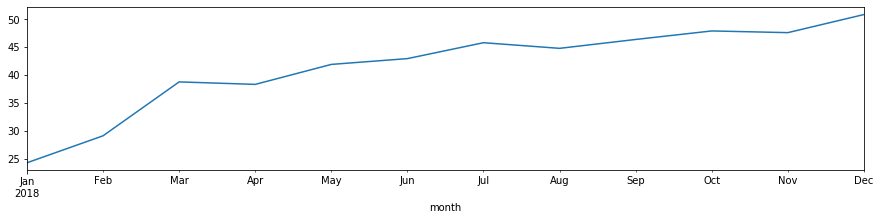

In [37]:
monthly_messages.groupby('month')['messages'].mean().plot(x= 'month', y='messages',
                                                    figsize = (15,3),
                                                    kind = 'line')

__Построю гистограмму среднего количества сообщений в месяц__

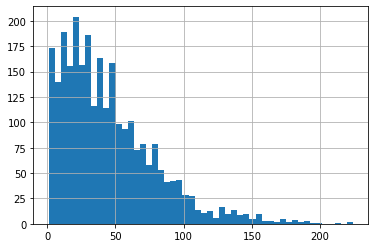

In [38]:
monthly_messages['messages'].hist(bins = 50)

__Построю гистограммы среднего количества потраченных минут в месяц по городам и тарифам__

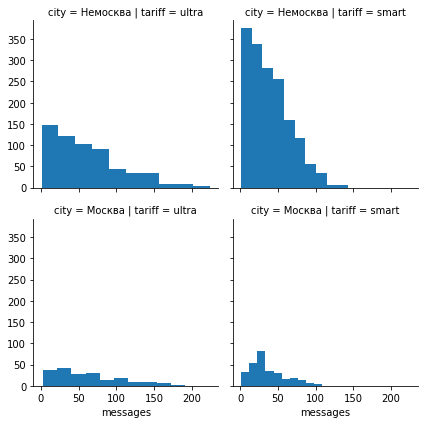

In [39]:
g = sns.FacetGrid(monthly_messages, col= 'tariff', row="city")
g = g.map(plt.hist, 'messages');

### Вывод
- __В среднем пишут 49 сообщений в месяц.__
- __Увеличение количества сообщений в начале года, вероятно связано с тем, что тарифные планы были введены в начале года и продавались весь этот год. Подтверждается теория со звонками и новым годом.__
- __Судя по гистограмме - распределение количества сообщений сильно скошенное вправо. При этом в Москве сообщений пишут значительно меньше.__

 ## Интернет
 __Что делаю__

- Объеденю таблицы интернета и пользователей, чтобы иметь информацию о тарифах и городе.
- Приведу дату к формату месяца, чтобы исследовать информацию помесячно.
- Подготовлю таблицу помесячных сообщений.
- Определю стреднее количество ГБ в месяц.
- Построю график среднего количества ГБ в месяц.
- Построю гистограмму распределения количества ГБ.
- Построю гистограмму по разным тарифам и региону Москва/Немосква.

__Обьеденю датафреймы__

In [40]:
united_internet = internet.merge(users, on='user_id', how='left')

__Привожу дату к формату месяца, чтобы исследовать информацию помесячно__

In [41]:
united_internet['month'] = united_internet.session_date.dt.to_period('M') 


__Получаю таблицу помесячных ГБ__

In [42]:
monthly_internet = united_internet.pivot_table(index = ['user_id','month', 'tariff', 'city'],
                                        values = 'mb_used',
                                        aggfunc = 'sum').reset_index()
monthly_internet.columns = ['user_id','month','tariff', 'city', 'mb_used']

__Определю стреднее количество ГБ для абонента в месяц.__

In [43]:
round(monthly_internet['mb_used'].mean())

41.0

__Построю график среднего количества ГБ для абонента в месяц.__

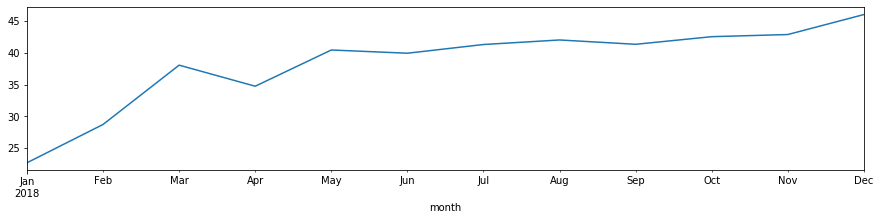

In [44]:
monthly_internet.groupby('month')['mb_used'].mean().plot(x= 'month', y='internet',
                                                    figsize = (15,3),
                                                    kind = 'line')

__Построю гистограмму распределения среднего количества ГБ в месяц__

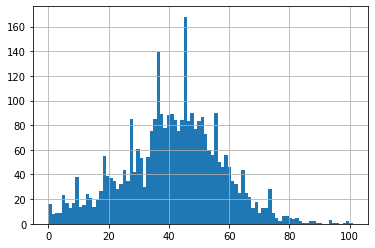

In [45]:
monthly_internet['mb_used'].hist(bins = 90)

__Построю гистограммы распределения среднего количества потраченных ГБ в месяц по городам и тарифам__

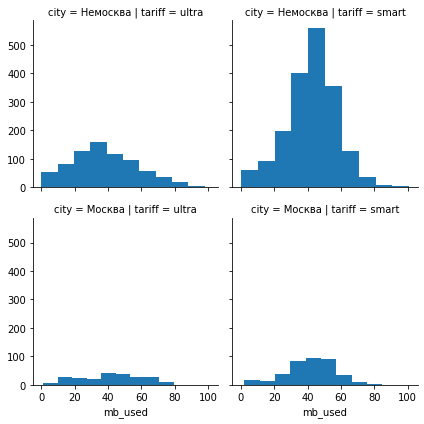

In [46]:
i = sns.FacetGrid(monthly_internet, col= 'tariff', row="city")
i = i.map(plt.hist, 'mb_used');

### Вывод
- __В среднем используют 41 ГБ данных в месяц.__
- __Увеличение количества ГБ в начале года, вероятно связано с тем, что тарифные планы были введены в начале года и продавались весь этот год. Зачем данные выросли в декабре теперь не очень понятно.__
- __Судя по гистограмме - распределение количества сообщений может быть биноминальным, незначительно скошено влево. При этом в Москве интернетом пользуются меньше, чем в регионах, особенно на тарифе ultra. В Москве пользователей, видимо меньше__

## Анализ выручки
__Что делаю__

- Объеденю все таблицы.
- Удалю все лишние столбцы.
- Добавлю столбец выручки для интернета.
- Добавлю столбец выручки для минут.
- Добавлю столбец выручки для сообщений.
- Добавлю столбец платежа по тарифу.
- Добавлю столбец общей выручки.
- Определю стреднюю выручку.
- Построю график средней выручки помесячно.
- Построю гистограмму распределения выручки.
- Построю гистограмму по разным тарифам и региону Москва/Немосква.
- Построю диаграмму распределения выручки помесячно по двум тарифам.
- Определю дисперсию, среднее и стандартное отклонение по каждому из тарифов.

__Обьеденяю датафреймы__

In [47]:
united_data = monthly_internet.merge(monthly_calls, on = ['user_id','month'], how = 'left')

__Удаляю лишние столбцы__

In [48]:
united_data = united_data.drop(united_data.columns[[5, 6]], axis='columns')

In [49]:
#united_data['minuts'] = united_data['minuts'].fillna(value = 0)

__Обьеденяю датафреймы__

In [50]:
united_data = united_data.merge(monthly_messages, on = ['user_id','month'], how = 'left')

__Удаляю лишние столбцы__

In [51]:
united_data = united_data.drop(united_data.columns[[6, 7]], axis='columns')

__Запрашиваю названия столбцов__

In [52]:
list(united_data.columns)

['user_id', 'month', 'tariff_x', 'city_x', 'mb_used', 'minuts', 'messages']

__Даю правильные имена__

In [53]:
united_data.columns = ['user_id', 'month', 'tariff', 'city', 'gb_used', 'minuts' , 'messages']

__Считаю выручку для интернета и добавляю соответствующий столбец__

In [54]:
def take_internet (united_data):
    lim_smart = 15
    lim_ultra = 30
    price_smart = 200
    price_ultra = 150
    gb = united_data['gb_used']
    if united_data['tariff'] == 'smart':
        if gb > lim_smart:
            return ((gb - lim_smart) * price_smart)
    else:
        if gb > lim_ultra:
            return ((gb - lim_ultra) *  price_ultra)
        

In [55]:
united_data['take_internet'] = united_data.apply(take_internet, axis=1).fillna(value = 0)

__Считаю выручку для потраченных минут и добавляю соответствующий столбец__

In [56]:
def take_minuts (united_data):
    lim_smart = 500
    lim_ultra = 3000
    price_smart = 3
    price_ultra = 1
    mean = united_data['minuts']
    if united_data['tariff'] == 'smart':
        if mean > lim_smart:
            return ((mean - lim_smart) * price_smart)
    else:
        if mean > lim_ultra:
            return ((mean - lim_ultra) *  price_ultra)

In [57]:
united_data['take_minuts'] = united_data.apply(take_minuts, axis=1).fillna(value = 0)

__Считаю выручку для сообщений и добавляю соответствующий столбец__

In [58]:
def take_messages (united_data):
    lim_smart = 50
    lim_ultra = 1000
    price_smart = 3
    price_ultra = 1
    mean = united_data['messages']
    if united_data['tariff'] == 'smart':
        if mean > lim_smart:
            return ((mean - lim_smart) * price_smart)
    else:
        if mean > lim_ultra:
            return ((mean - lim_ultra) *  price_ultra)

In [59]:
united_data['take_messages'] = united_data.apply(take_messages , axis=1).fillna(value = 0)

__Добавляю столбец с ежемесячными платежами__

In [60]:
def fee(i):
    if i == 'smart':
        return 500
    else:
        return 3000

In [61]:
united_data['fee'] = united_data['tariff'].apply(fee)

__Добавляю столбец с общей выручкой__

In [62]:
united_data['take_profit']=united_data['take_internet']+united_data['take_minuts']+united_data['take_messages']+united_data['fee'] 

__Общий вид таблицы__

In [63]:
united_data

,user_id,month,tariff,city,gb_used,minuts,messages,take_internet,take_minuts,take_messages,fee,take_profit
0,1000,2018-05,ultra,Немосква,4,164.0,22.0,0.0,0.0,0.0,3000,3000.0
1,1000,2018-06,ultra,Немосква,49,187.0,60.0,2850.0,0.0,0.0,3000,5850.0
2,1000,2018-07,ultra,Немосква,28,346.0,75.0,0.0,0.0,0.0,3000,3000.0
3,1000,2018-08,ultra,Немосква,27,418.0,81.0,0.0,0.0,0.0,3000,3000.0
4,1000,2018-09,ultra,Немосква,26,478.0,57.0,0.0,0.0,0.0,3000,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3198,1498,2018-10,smart,Немосква,50,258.0,42.0,7000.0,0.0,0.0,500,7500.0
3199,1499,2018-09,smart,Немосква,5,71.0,11.0,0.0,0.0,0.0,500,500.0
3200,1499,2018-10,smart,Немосква,44,473.0,48.0,5800.0,0.0,0.0,500,6300.0
3201,1499,2018-11,smart,Немосква,41,624.0,59.0,5200.0,372.0,27.0,500,6099.0


__Определю стреднюю выручку.__

In [64]:
round(united_data['take_profit'].mean())

5820.0

__Построю график средней выручки помесячно.__

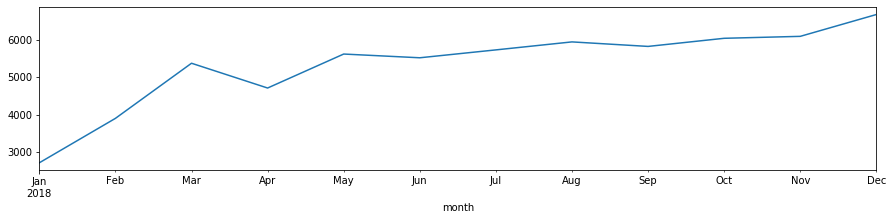

In [65]:
united_data.groupby('month')['take_profit'].mean().plot(x= 'month', y='take_profit',
                                                    figsize = (15,3),
                                                    kind = 'line')

__Построю гистограмму распределения выручки.__

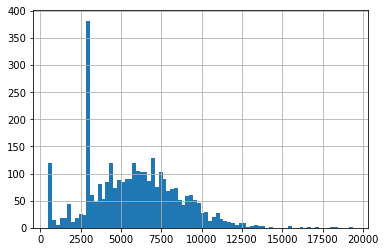

In [66]:
united_data['take_profit'].hist(bins = 80)

__Построю гистограмму по разным тарифам и региону Москва/Немосква.__

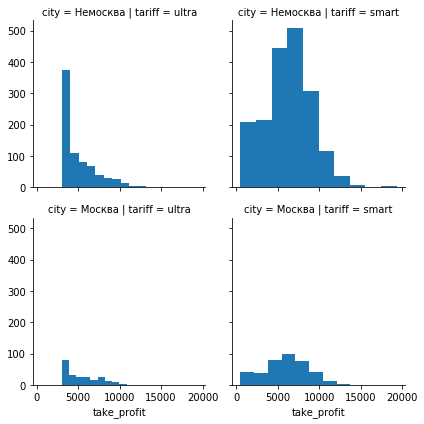

In [67]:
f = sns.FacetGrid(united_data, col='tariff', row="city")
f = f.map(plt.hist, 'take_profit')

__Построю диаграмму распределения выручки помесячно по двум тарифам.__

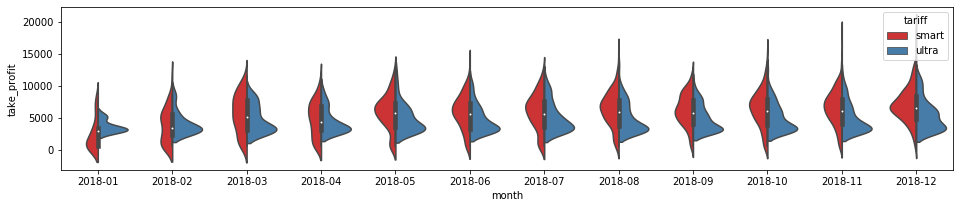

In [68]:
united_data = united_data.sort_values(['month'], ascending = True)
plt.figure(figsize=(16, 3))
sns.violinplot(
    x="month", y="take_profit", data=united_data, hue='tariff', split=True, palette='Set1')

In [69]:
smart = united_data[united_data['tariff'] == 'smart'].sort_values(['month'], ascending = True)

In [70]:
ultra = united_data[united_data['tariff'] == 'ultra'].sort_values(['month'], ascending = True)

__Параметры тарифа ULTRA__

In [71]:
print()
print('Для выручки тарифа ULTRA  дисперсия =', np.var(ultra['take_profit']), 'среднее =', ultra['take_profit'].mean(), 'стандартное отклонение =', ultra['take_profit'].std())


Для выручки тарифа ULTRA  дисперсия = 4698285.207100592 среднее = 4913.846153846154 стандартное отклонение = 2168.6652366248813


__Параметры тарифа SMART__

In [72]:
print()
print('Для выручки тарифа SMART  дисперсия =', np.var(smart['take_profit']), 'среднее =', smart['take_profit'].mean(), 'стандартное отклонение =', smart['take_profit'].std())


Для выручки тарифа SMART  дисперсия = 8396366.729045056 среднее = 6216.624775583483 стандартное отклонение = 2898.298981819567


### Вывод
- __В среднем тарифы приносят 5820 рублей в месяц.__
- __При этом стредяя выручка по тарифу с меньшей абонентской платой выше на 1300 рублей в месяц.__
- __Из гистограммы видно, что некоторые не перетрачивают на тарифвх и мы можем видеть всплески на 500 и 3000__
- __Из гистограммы по тарифам и городам видно, что пользователи ULTRA практически не перерасходуют план, в то время как пользователи Smart, делают это почти всегда__
- __Из диаграммы распределения выручки помесячно по двум тарифам очевидно, что средний пользователь SMART каждый месяц показывал нормальное поведение и траты в районе 6000, в то время как у пользователя ULTRA, прослеживается биноминальность с пиками на 3000 (ежемесячный платеж) и 5000__
- __Из графика средней выручки становится очевидно, что дело не в Новом годе, люди стали активнее пользоваться связью и тратить на нее больше денег в с января по декабрь__
- __Судя по гистограмме в Москве пользователей, видимо меньше__

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Согласен с выводами, молодец

## Распределение по тарифам
__Что делаю__

- Прповерю распределение потраченных минут и тяготения пиков к лимитам.
- Прповерю распределение потраченных ГБ и тяготения пиков к лимитам.
- Прповерю распределение отправленных сообщений и тяготения пиков к лимитам.


__Прповерю распределение потраченных минут и тяготения пиков к лимитам.__

__Общее распределение для потраченных минут__

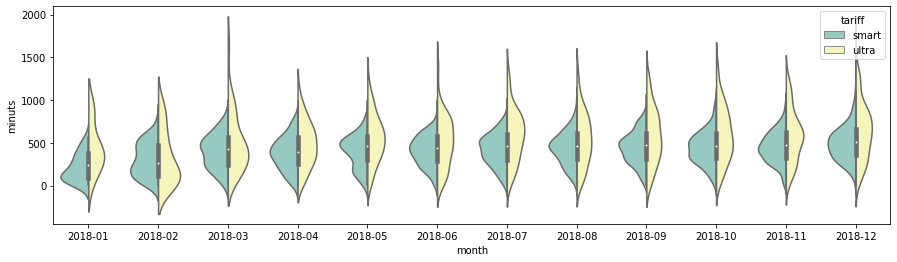

In [73]:
plt.figure(figsize=(15, 4))
sns.violinplot(
    x="month", y="minuts", data=united_data, hue='tariff', split=True, palette='Set3')

__Ящик с усами минуты для SMART__

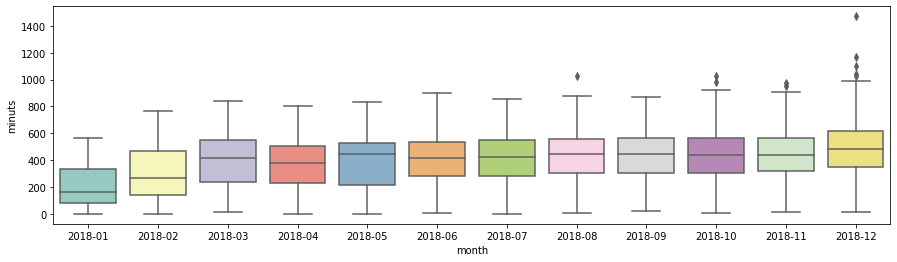

In [74]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="month", y="minuts", data=smart, palette='Set3')

__Ящик с усами минуты для ULTRA__

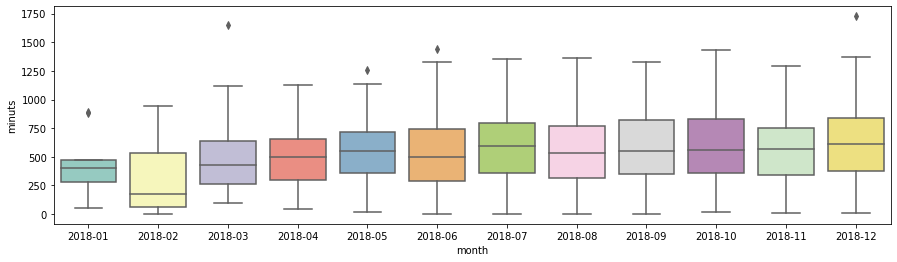

In [75]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="month", y="minuts", data=ultra, palette='Set3')

__Общее распределение для потраченных ГБ__

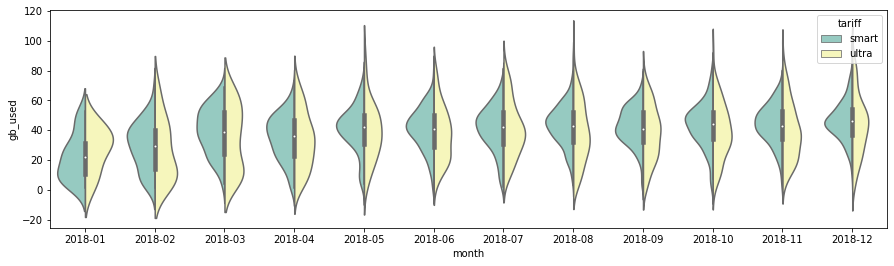

In [76]:
plt.figure(figsize=(15, 4))
sns.violinplot(
    x="month", y="gb_used", data=united_data, hue='tariff', split=True, palette='Set3')

__Ящик с усами ГБ для SMART__

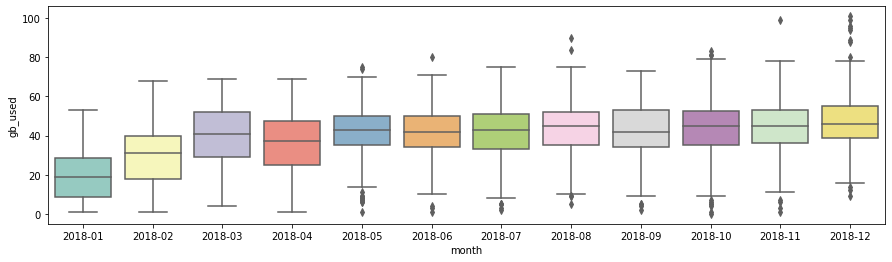

In [77]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="month", y="gb_used", data=smart, palette='Set3')

__Ящик с усами ГБ для ULTRA__

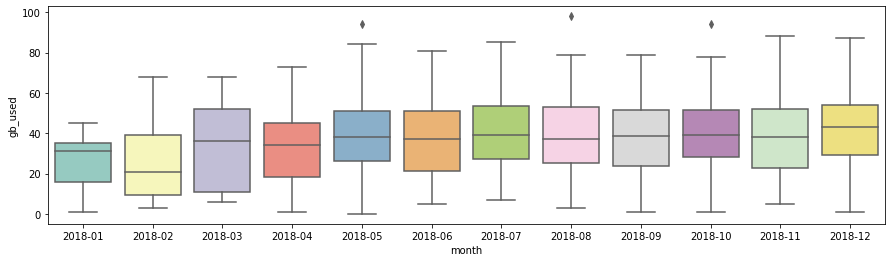

In [78]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="month", y="gb_used", data=ultra, palette='Set3')

__Общее распределение для отправленных сообщений__

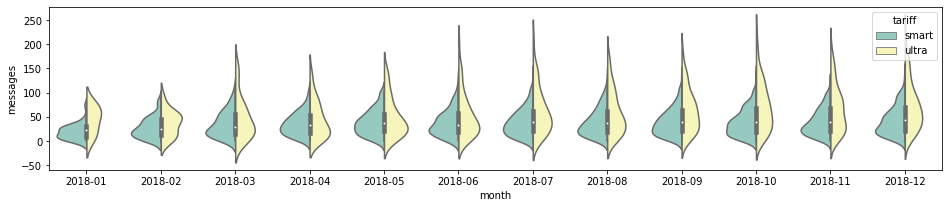

In [79]:
plt.figure(figsize=(16, 3))
sns.violinplot(
    x="month", y="messages", data=united_data, hue='tariff', split=True, palette='Set3')

__Ящик с усами сообщения для SMART__

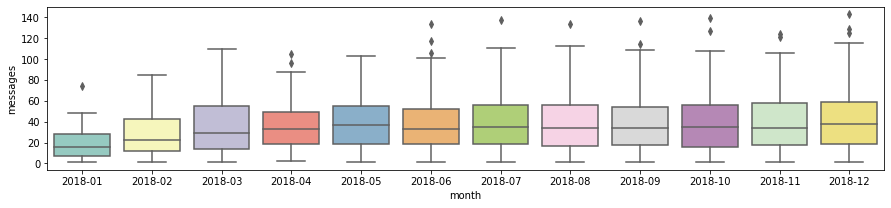

In [80]:
plt.figure(figsize=(15, 3))
sns.boxplot(x="month", y="messages", data=smart, palette='Set3')

__Ящик с усами сообщения для ULTRA__

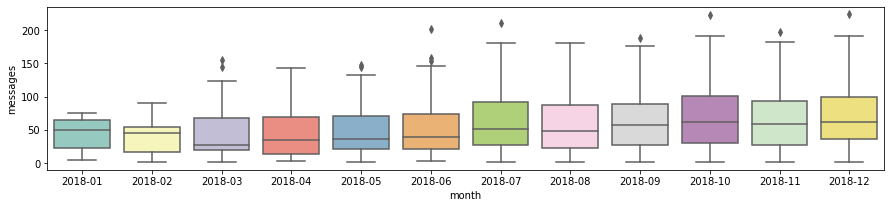

In [81]:
plt.figure(figsize=(15, 3))
sns.boxplot(x="month", y="messages", data=ultra, palette='Set3')

__

In [82]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод
- __Средний пользователь ULTRA говорит больше, но не на много, чем пользователь тарифа SMART. Люди на SMART следят за оставшимися минутами и в среднем используют только 400 минут из 500, тогда как пользователи ULTRA выговаривают только 500-600 из оплаченных 3000__
- __Сообщениями мало кто пользуется и опять для SMART, среднее значение в лимите тарифа, а ULTRA пишут ненамного больше, но никто из пользователей ULTRA не платит за сообщения, в то время как часть пользователей SMART привышает лимит.__
- __Очень узкий ящик для SMART со средним значением в районе 40 ГБ, что привышает их бесплатный порог в 15 ГБ, показывает что 50 процентов пользователей всегда привышают свой лимит по использованию данных, при этом плата за такое привышение в три раза больще, чем на тарифе ULTRA. Отсюда и такая невыгодность для пользователя и выгода для оператора)__

<div style="border:solid  orange  2px; padding: 20px"> <h1 style="color: orange ; margin-bottom:20px">Комментарий наставника</h1>

Тут всё абсолютно верно, верные выводы, но стоило бы строить больше разнообразных визуализаций, это будет очень важным навыком , который точно пригодится тебе в будущем, так как в любой аналитике графики являются наглядным подтверждением твоих выводов

## Проверка гипотез
__В задании две гипотезы, ответы на которые мы уже увидели в данных__

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

__Создам два датафрэйма для Москвы и Немосквы__

In [83]:
moscow = united_data[united_data['city'] == 'Москва'].sort_values(['month'], ascending = True)

In [84]:
regions = united_data[united_data['city'] == 'Немосква'].sort_values(['month'], ascending = True)

## Проверю гипотезу, что средняя выручка в Москве и регионах одинакова

__Посмотрю на диаграмму распределения выручки__

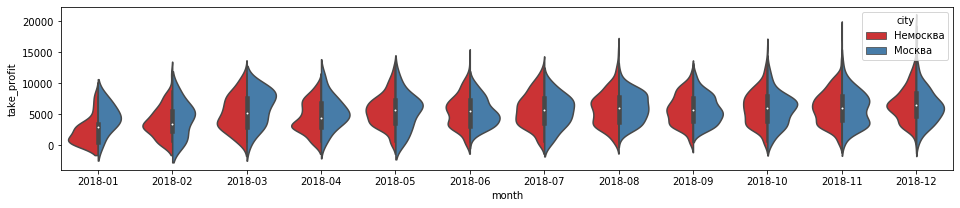

In [85]:
plt.figure(figsize=(16, 3))
sns.violinplot(
    x="month", y="take_profit", data=united_data, hue='city', split=True, palette='Set1')

__Проверю гипотезу__

In [86]:
alpha = .05 

results = st.ttest_ind(
    moscow['take_profit'].tolist(), 
    regions['take_profit'].tolist(),equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5403858104093902
Не получилось отвергнуть нулевую гипотезу


__Гипотезу не получилось отвергнуть. Поведение людей в Москве и регионах не ситльно отличается. Тем не менее по распределению видно, что данные ранних клиентов отличаются. Проверю гипотезу на ранних клиентах__

In [87]:
moscow_true = moscow.query('month < "2018-06"')

In [88]:
regions_true = regions.query('month < "2018-06"')

In [89]:
alpha = .05 

results = st.ttest_ind(
    moscow_true['take_profit'].tolist(), 
    regions_true['take_profit'].tolist(),equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0762279843844664
Не получилось отвергнуть нулевую гипотезу


__Несмотря на визуальные отличия, гипотезу опровергнуть не удалось. Поведение людей, в основном, похоже__

## Проверю гипотезу, что средняя выручка тарифов смарт и ультра одинакова

__Посмотрю на диаграмму распределения выручки__

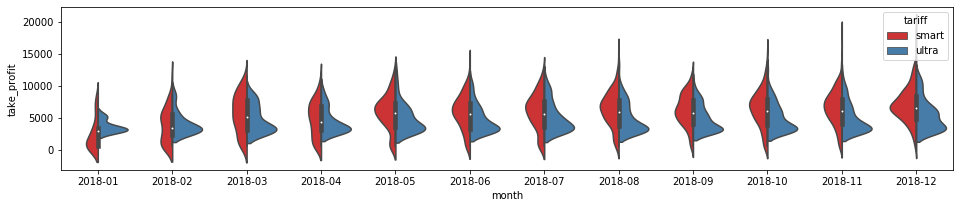

In [90]:
plt.figure(figsize=(16, 3))
sns.violinplot(
    x="month", y="take_profit", data=united_data, hue='tariff', split=True, palette='Set1')

__Проверю гипотезу__

In [91]:
alpha = .05 

results = st.ttest_ind(
    smart['take_profit'].tolist(), 
    ultra['take_profit'].tolist(),equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.4005816779229994e-43
Отвергаем нулевую гипотезу


__Гипотеза отвергнута. Выручка не одинакова, тем не менее по распределению видно, что данные поздних клиентов стабильнее. Проверю гипотезу на поздних клиентах__

In [92]:
smart_true = smart.query('month > "2018-06"')

In [93]:
ultra_true = ultra.query('month > "2018-06"')

In [94]:
alpha = .05 

results = st.ttest_ind(
    smart_true['take_profit'].tolist(), 
    ultra_true['take_profit'].tolist(),equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7479427011003742e-42
Отвергаем нулевую гипотезу


__Гипотеза отвергнута, хоть и с меньшим р-значением. Пользователи тарифа smart тратят больше__

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Гипотезы проверены, молодец!)

## Общий вывод

- __Тариф SMART, привлекая низкой абонентской платой и невысоким порогом вхождения, но добирает на высокой стоимости интернета и в итоге более выгоден для продажи, хотя вероятно, им пользуются менее стабильные клиенты__
- __Тариф ULTRA, вероятно, привлекает стабильных клиентов, которые остануться с компанией на долгие годы, но принесут меньше денег в моменте__

Проверю эту теорию на покинувших компанию 38 человеках

In [98]:
users.groupby('tariff').count()

,user_id,age,churn_date,city,first_name,last_name,reg_date
tariff,,,,,,,
smart,351,351,23,351,351,351,351
ultra,149,149,15,149,149,149,149


In [96]:
if 23/351 > 15/149:
    print('Так себе теория')
else:
    print('Так оно и есть')

Так оно и есть


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Вывод получился достаточно точным и подробным, здорово! Так же можешь в будущем в выводе приводить больше цифр полученных в ходе выполнения работы